# Visualizing Data - Data Exploration
Cerebral Cortex contains a number of built-in visualization capabilities. This demonstration page will take you through some examples based on typical stress data from mCerebrum and Cerebral Cortex algorithms.


## Initialize the system

In [3]:
%reload_ext autoreload
from util.dependencies import *
CC = Kernel("/home/jovyan/cc_conf/", study_name="default")

## Generate some sample stress data
This example utilizes a data generator to protect the privacy of real participants and allows for anyone utilizing this system to explore the data without required institutional review board approvals. This is disabled for this demonstration to not create too much data at once.

In [4]:
stress_stream = gen_stress_data(stream_name="STRESS-STREAM", spark_df=True)

## Plot examples
The following are some example of the types of plots that the system is capable of generating.  These plots utilize off-the-shelf visualization libraries and can be easily modified and/or extended for other datastreams.  Since stress is a core component of MD2K's research, it has been included within the Cerebral Cortex platform for direct use and these examples will utilize it for demonstration purposes.

In [5]:
from cerebralcortex.plotting.stress.plots import plot_stress_bar, plot_stress_gantt, plot_stress_pie, plot_stress_sankey, plot_stress_comparison

### Pie Chart
In this example, the data is grouped into the major stressor categories, _Job, Driving, Finance, and Health_, and the relative breakdown of events are shown within the chart.  If you place your mouse cursor over the pie chart sections, you can see the actual number of events and a category label appear.  Try clicking on one or more of the labels in the legend on the right to disable/enable the data on the graph.

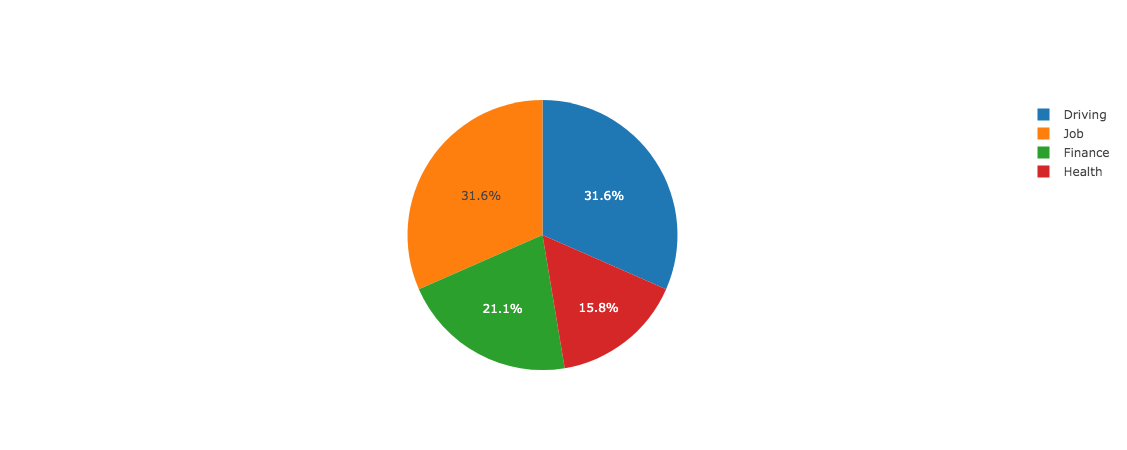

In [6]:
plot_stress_pie(stress_stream)

### Gantt Chart
A Gantt chart is typically utilzed to show scheduling information, we utilize it to provide a temporal breakdown of events in different classes.  You will see the same major category labels as before; however, this chart shows the details of the stressors when you place the mouse cursor over the boxes.  This particular chart is interactive and zoomable.  Try it out by dragging a box around some of the data to zoom in and see the data in more detail.  To go back, click on the __home__ icon to reset the zoom to the original state.  

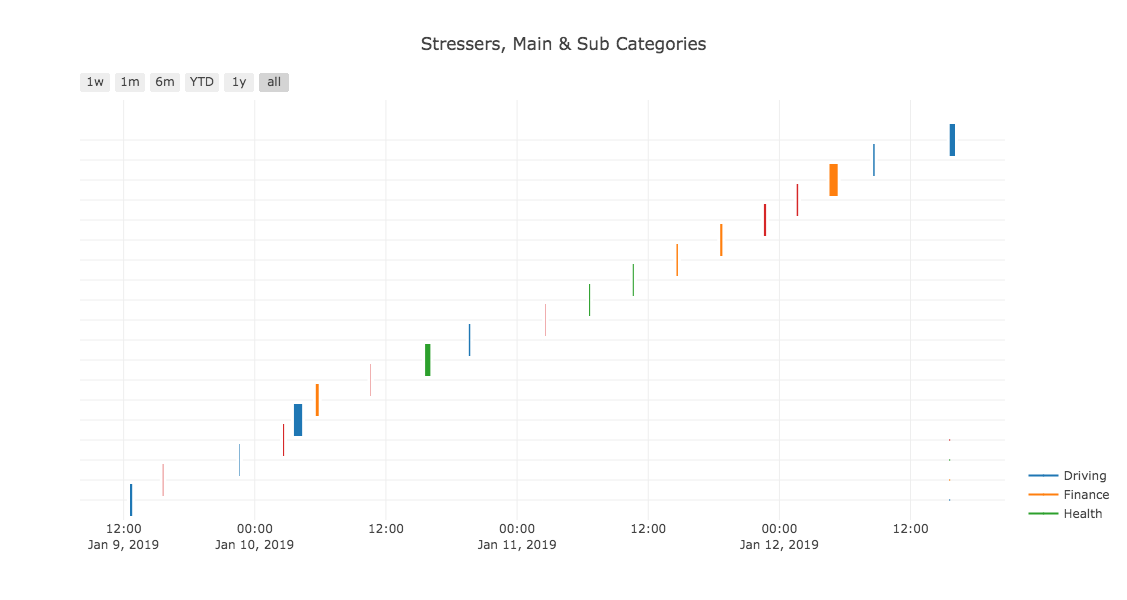

In [7]:
plot_stress_gantt(stress_stream)

### Sankey diagram
A [Sankey diagram](https://en.wikipedia.org/wiki/Sankey_diagram) is utilized to show the flow between different components and, in our case, the breakdown between categories, sub-categories, and activities.   

This diagram shows the stressor categories on the left edge and the detailed stress information on the right.  In the middle are the activity classificiations, derived from a smartphone, of what the person was doing at the time of the stress event.  You can move the mouse cursor over the boxes and lines to see the details and highlight a flow within the diagram.  You may see that the events might not be ordered to your liking or that their order could be improved.  Try dragging the boxes up and down to change this order and watch the diagram adjust.

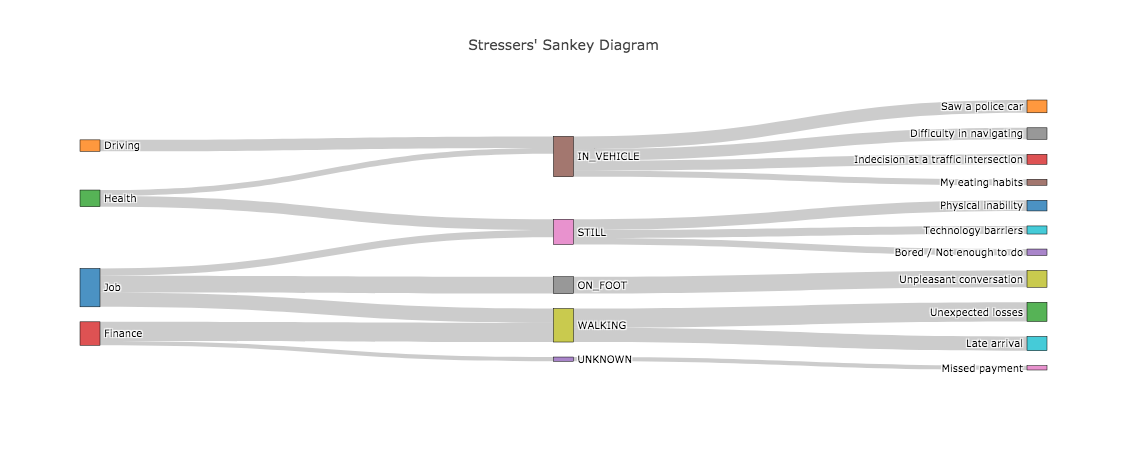

In [8]:
plot_stress_sankey(stress_stream,cat_cols=["stresser_main","activity","stresser_sub"])

### Bar charts
Sometimes it is best to utilize bar charts to demonstrate the differences between subsets of participants.  In this example, we show the difference in stress events between the two participants in the example data for each of the four major stressor categories.  This chart is interactive using the mouse and controls to explore the data. The legend labels can be enabled/disabled by clicking on them.

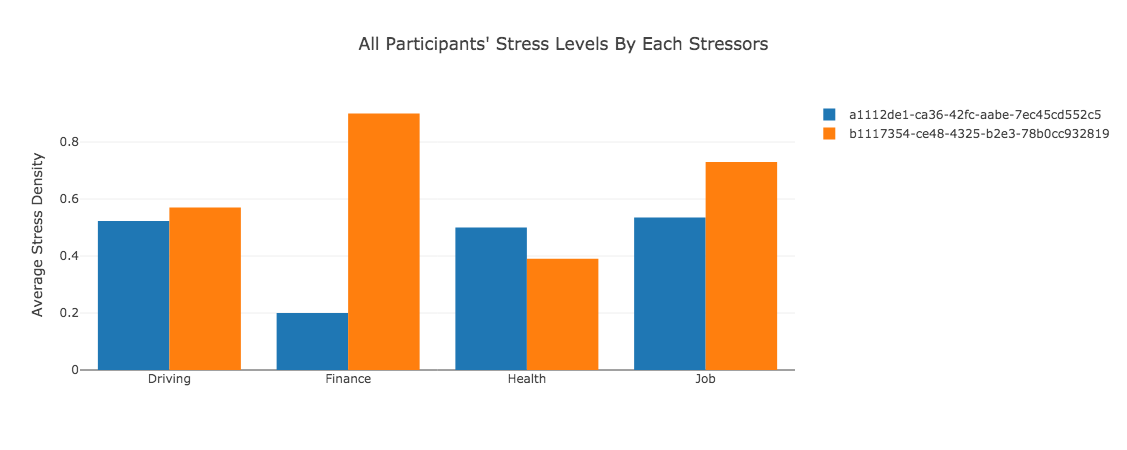

In [9]:
plot_stress_bar(stress_stream)

## Compare stress data among participants(s)

There are instances where you may want to compare a participant's values with the population values.  This chart shows the breakdown of average stress induced by each of the sub-categories for a particular participant (`a1112de1-ca36-42fc-aabe-7ec45cd552c5`) when compared with the whole study population.  You can alter the command by changing the `usr_id` to `b1117354-ce48-4325-b2e3-78b0cc932819` or by changing the `x_axis_column` to `stresser_main`.  In the latter case, the graph should match the one directly above due to there only being two participants in the demonstration data.

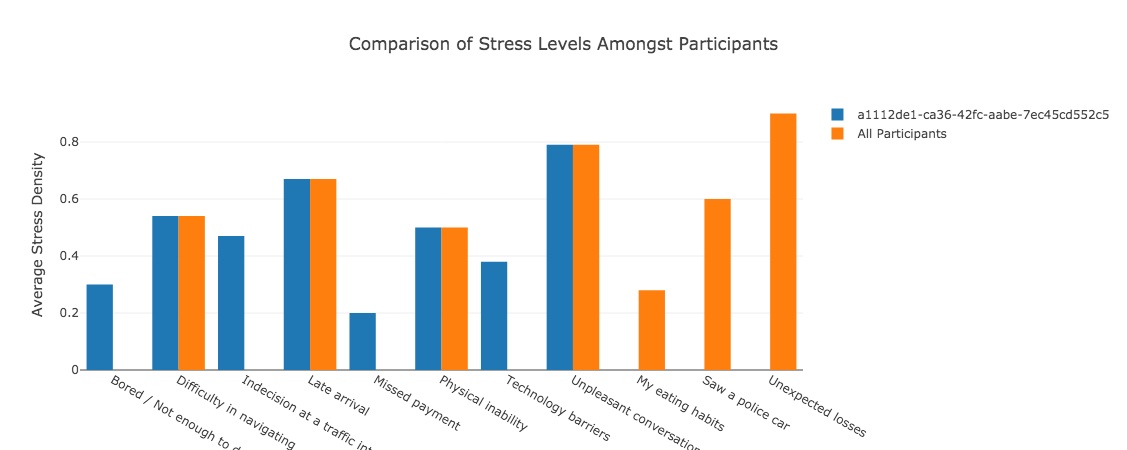

In [10]:
plot_stress_comparison(stress_stream, x_axis_column="stresser_sub",usr_id="a1112de1-ca36-42fc-aabe-7ec45cd552c5")